In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
prev = pd.read_csv('../input/previous_application.csv')

In [3]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
(prev.isnull().sum() / len(prev)).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       0.9963
RATE_INTEREST_PRIMARY          0.9963
RATE_DOWN_PAYMENT              0.5046
AMT_DOWN_PAYMENT               0.5046
NAME_TYPE_SUITE                0.4848
DAYS_TERMINATION               0.3856
NFLAG_INSURED_ON_APPROVAL      0.3856
DAYS_FIRST_DRAWING             0.3856
DAYS_FIRST_DUE                 0.3856
DAYS_LAST_DUE_1ST_VERSION      0.3856
DAYS_LAST_DUE                  0.3856
AMT_GOODS_PRICE                0.2122
CNT_PAYMENT                    0.2085
AMT_ANNUITY                    0.2085
PRODUCT_COMBINATION            0.0002
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_CREDIT                     0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
AMT_APPLICATION                0.0000
NAME_PAYMENT_TYPE              0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISIO

<font size=3> NOTE: NFLAG_MICRO_CASH mentioned in the feaure description is not provided int the data

In [5]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

In [6]:
prev['FLAG_LAST_APPL_PER_CONTRACT'], _ = pd.factorize(prev['FLAG_LAST_APPL_PER_CONTRACT'])

<font size=5> DISTRIBUTION

In [7]:
cate_cols = [col for col in prev.columns if prev[col].dtype=='object']

In [8]:
cate_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

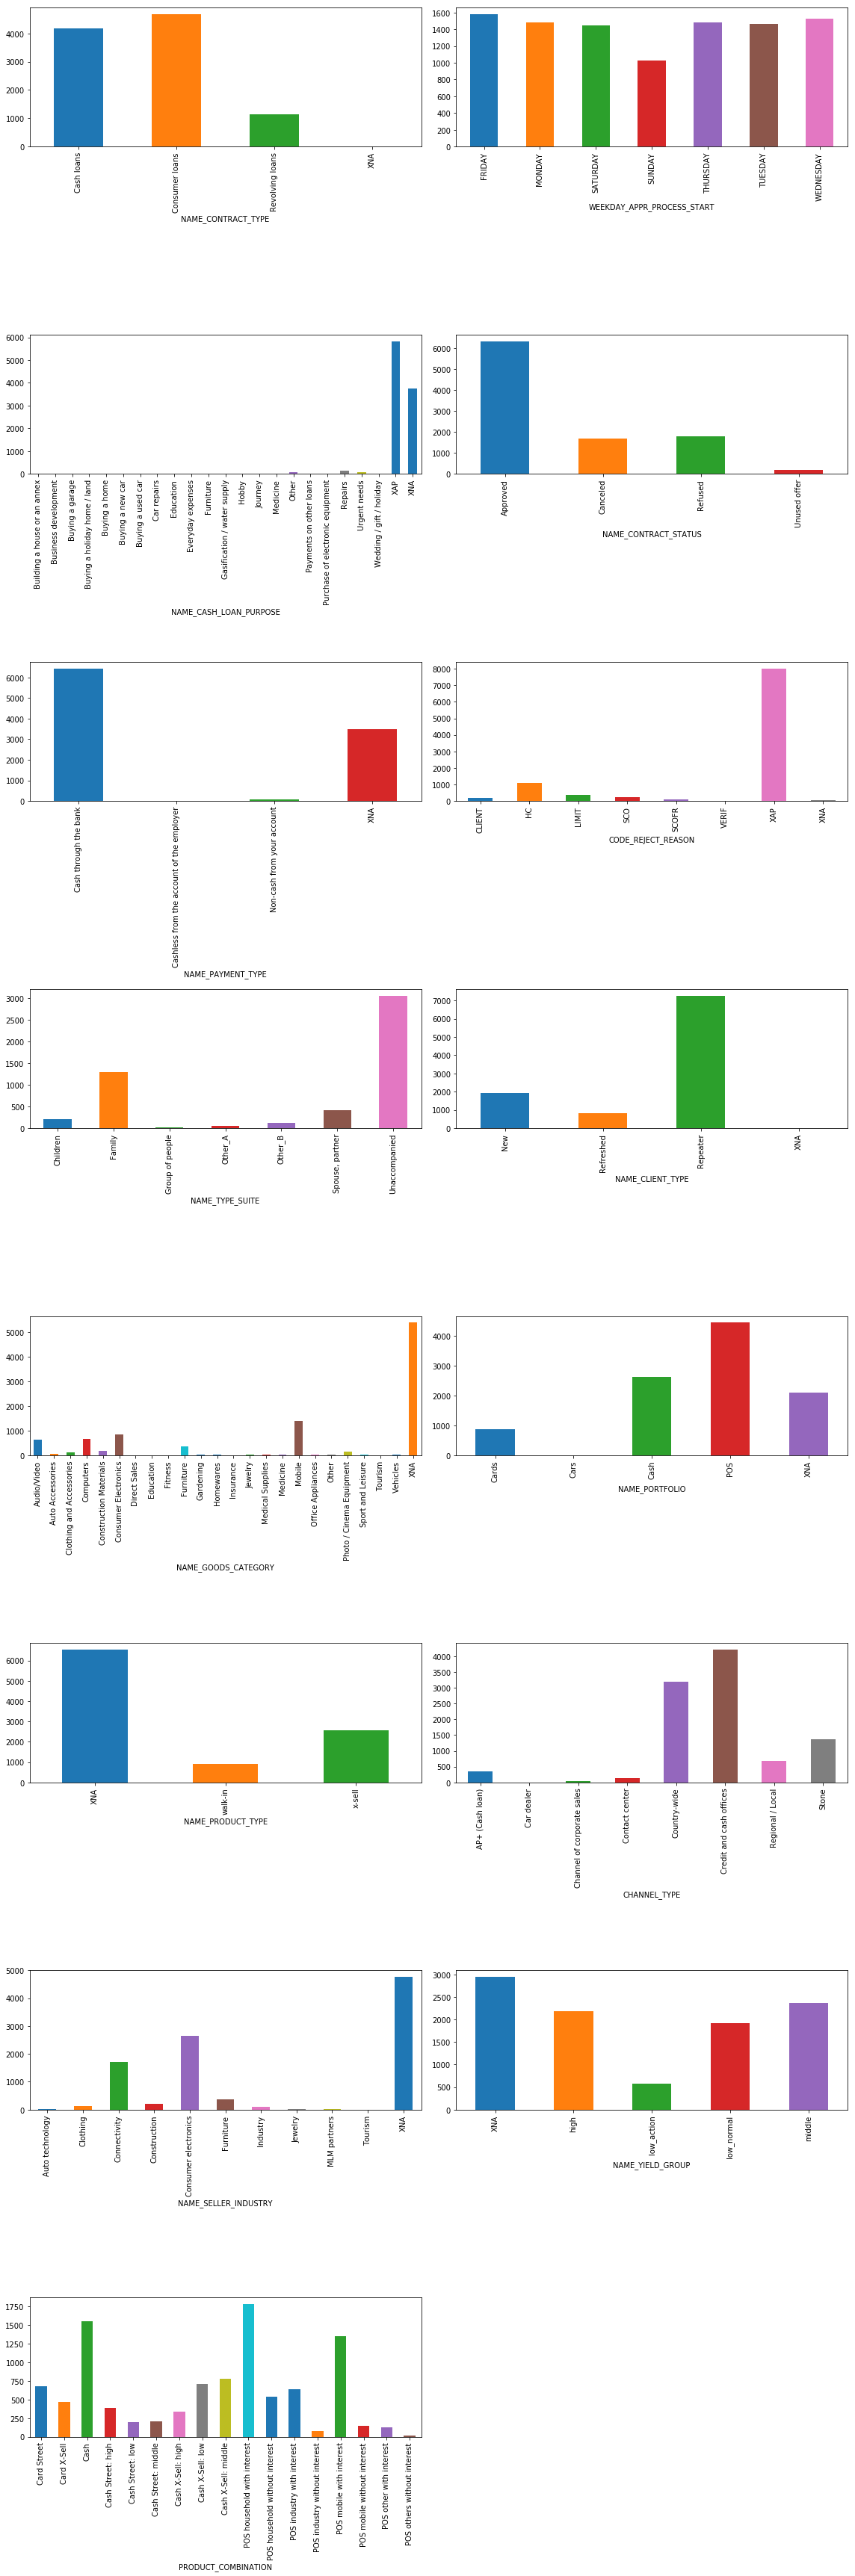

In [9]:
def draw_cate_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(16, 48))
    for col in cols:
        plt.subplot(n_row, 2, i)
        prev.groupby(col).size().plot(kind='bar')
        i += 1
    plt.tight_layout()
    plt.show()

draw_cate_dist(cate_cols)

<font size=5> DIST on FLAG cols

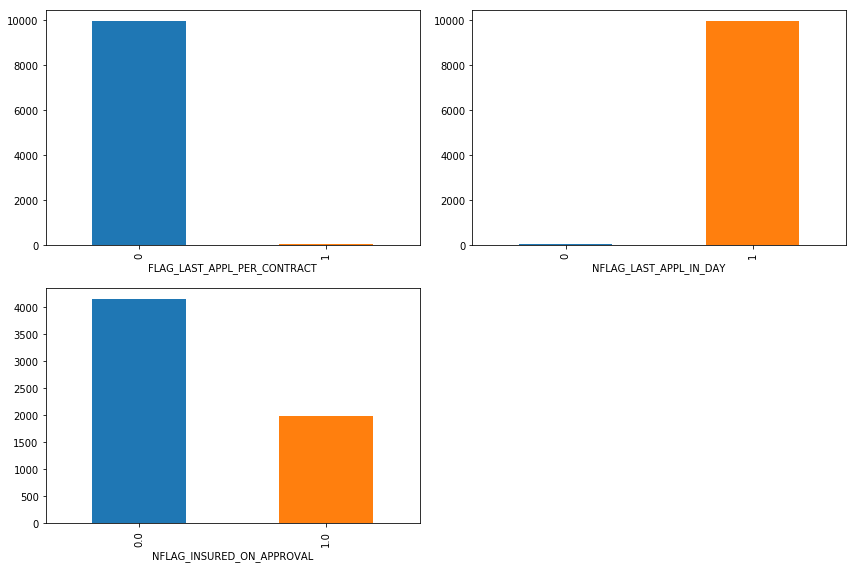

In [10]:
flag_cols = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']

def draw_flag_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(12, 8))
    for col in cols:
        plt.subplot(n_row, 2, i)
        prev.groupby(col).size().plot(kind='bar')
        i += 1
    plt.tight_layout()
    plt.show()
draw_flag_dist(flag_cols)

<font size=5> DIST on AMT cols

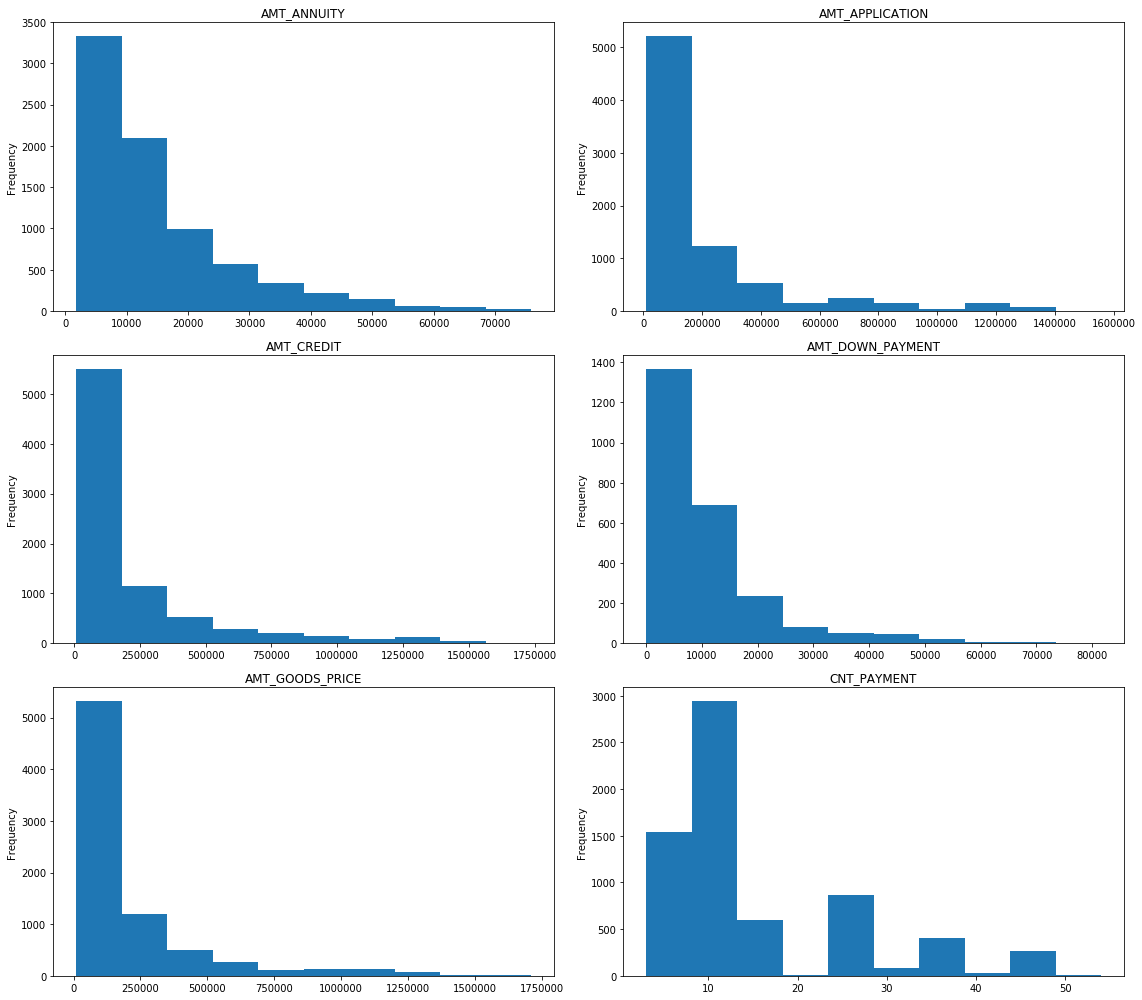

In [11]:
def draw_amt_dist(amt_cols):
    from math import ceil
    n_row = ceil(len(amt_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 14))
    for col in amt_cols:
        plt.subplot(n_row, 2, i)
        if prev[col].nunique() > 10:
            up_bnd = prev[col].quantile(.995)
            low_bnd = prev[col].quantile(.005)
            prev[(prev[col] > low_bnd) & (prev[col] < up_bnd)][col].plot(kind='hist')
        else:
            prev[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

amt_cols = [col for col in prev.columns if "AMT" in col] + ['CNT_PAYMENT']
draw_amt_dist(amt_cols)

<font size=5> DIST on DAYS cols

<font size=3> SOME NOTES 
DAYS_FIRST_DUE - when was the first due date (first installment)

DAYS_LAST_DUE_1ST_VERSION - when was the planned last due date (last installment) - information from the time of application


DAYS_LAST_DUE - when was the last due date (last installment) - most recent information (last due date may change e.g. in case of early repayment or payment difficulties)

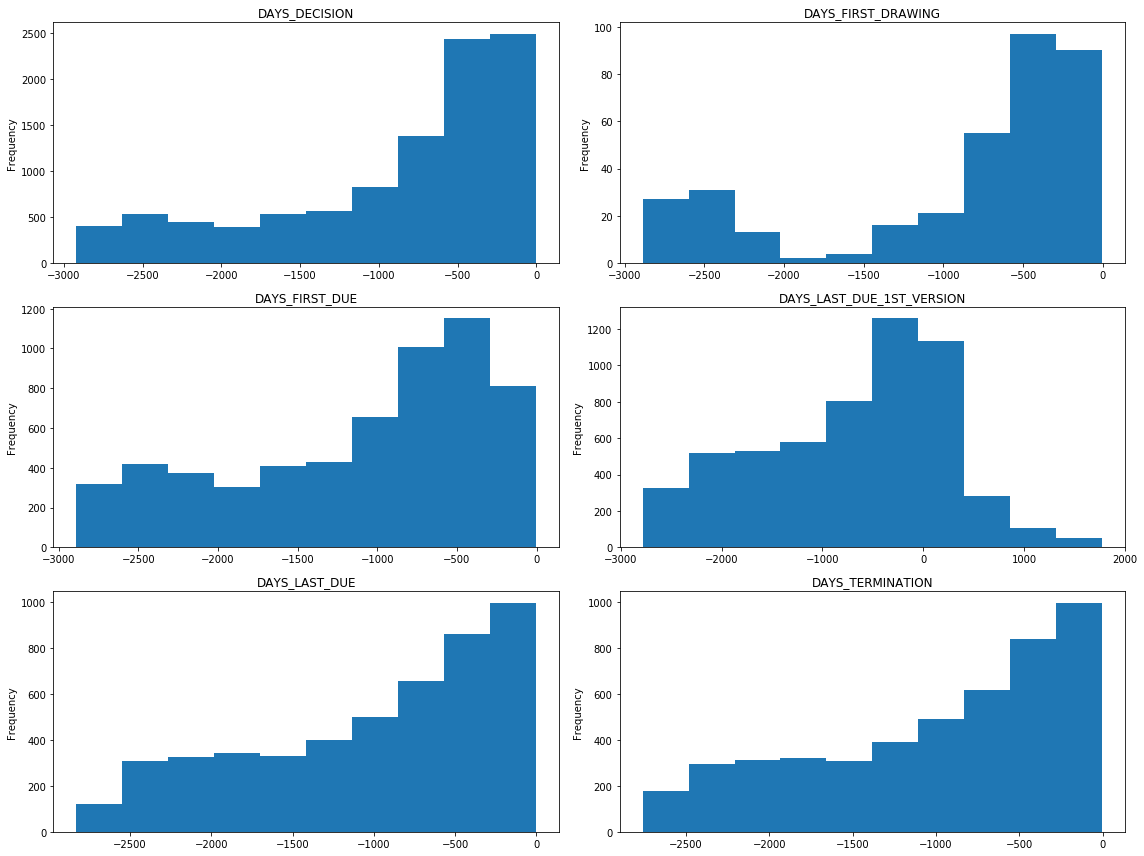

In [12]:
def draw_days_dist(days_cols):
    from math import ceil
    n_row = ceil(len(days_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 12))
    for col in days_cols:
        plt.subplot(n_row, 2, i)
        prev[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

days_cols = [col for col in prev.columns if "DAYS" in col]
draw_days_dist(days_cols)

<font size=5> SELLERPLACE_AREA - an cate col but encoding as int

In [13]:
prev.groupby('SELLERPLACE_AREA').size().sort_values(ascending=False)[:50] / len(prev)

SELLERPLACE_AREA
-1       0.4188
 0       0.0361
 100     0.0224
 20      0.0219
 50      0.0219
 30      0.0217
 40      0.0124
 15      0.0117
 10      0.0113
 25      0.0112
 150     0.0108
 5       0.0096
 200     0.0090
 1000    0.0085
 4       0.0078
 60      0.0075
 35      0.0063
 1500    0.0061
 2000    0.0059
 45      0.0057
 300     0.0051
 500     0.0041
 70      0.0038
 3       0.0037
 6       0.0036
 1       0.0035
 80      0.0035
 120     0.0034
 2       0.0034
 1200    0.0032
 32      0.0032
 38      0.0031
 44      0.0030
 149     0.0029
 140     0.0029
 3000    0.0027
 400     0.0027
 250     0.0026
 24      0.0026
 51      0.0025
 800     0.0025
 36      0.0025
 37      0.0025
 2500    0.0024
 12      0.0024
 42      0.0023
 1600    0.0023
 72      0.0023
 2200    0.0022
 23      0.0022
dtype: float64

<font size=5> MANUAL FEATURE

In [14]:
def batch_agg(df, agg_info, prefix=''):
    for info in agg_info:
        by_cols = info['by']
        on_cols = info['on']
        agg_method = info['agg']
        gby = df.groupby(by_cols)[on_cols]
        new_col_names = [
            "{}{}_ON_{}_BY_[ {} ]".
            format(prefix,
                   agg_method,
                   on_col,
                   ', '.join(by_cols))
            .upper() for on_col in on_cols
        ]
        nameMap = dict(zip(on_cols, new_col_names))
        temp = gby.agg(agg_method).rename(columns=nameMap).reset_index()
        df = df.merge(temp, on=by_cols, how='left')
    return df

def agg(df, by_cols, on_cols, prefix=''):
    agg_info = []
    for by_col in by_cols:
        info = dict(by=list(by_col), on=on_cols, agg='mean')
        agg_info.append(info)

    return batch_agg(df, agg_info, prefix)

In [3]:
# handle on AMT features
prev['APP_TO_ANNUITY_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_ANNUITY']
prev['APP_TO_CREDIT_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
prev['APP_TO_DOWN_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_DOWN_PAYMENT']
prev['APP_TO_PRICE_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_GOODS_PRICE']

prev['ANNUITY_TO_CREDIT_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_CREDIT']
prev['ANNUITY_TO_DOWN_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_DOWN_PAYMENT']
prev['ANNUITY_TO_PRICE_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_GOODS_PRICE']

prev['CREDIT_TO_DOWN_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_DOWN_PAYMENT']
prev['CREDIT_TO_PRICE_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_GOODS_PRICE']

prev['DOWN_TO_PRICE_RATIO'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_GOODS_PRICE']
prev['APP_SUB_CREDIT'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']

# AVG AMT
prev['AVG_PAYMENT_AMT_CREDIT'] = prev['AMT_CREDIT'] / prev['CNT_PAYMENT']
prev['AVG_PAYMENT_AMT_ANNUITY'] = prev['AMT_ANNUITY'] / prev['CNT_PAYMENT']
prev['AVG_PAYMENT_TOTAL'] = prev['AVG_PAYMENT_AMT_CREDIT'] + prev['AVG_PAYMENT_AMT_ANNUITY']

In [4]:
# handle on DAYS features
prev['PLAN_TIME_SPAN'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_FIRST_DUE']
prev['ACTUAL_TIME_SPAN'] = prev['DAYS_LAST_DUE'] - prev['DAYS_FIRST_DUE']
prev['LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE'] - prev['DAYS_LAST_DUE_1ST_VERSION']
prev['ACTUAL_TIME_SPAN_TO_PLAN_RATIO'] = prev['ACTUAL_TIME_SPAN'] / prev['PLAN_TIME_SPAN']
prev['DAYS_DESICION_TO_FTRST_DUE_RATIO'] = prev['DAYS_DECISION'] / prev['DAYS_FIRST_DUE']
prev['DAYS_TERMINATION_SUB_LAST_DUE'] = prev['DAYS_TERMINATION'] - prev['DAYS_LAST_DUE']

prev['IS_EARLY_PAID'] = (prev['DAYS_LAST_DUE'] < prev['DAYS_LAST_DUE_1ST_VERSION']).astype('float')
# LAST_DUE was later than planned, might indicate finicial difficulty
prev['IS_LATER_PAID'] = (prev['DAYS_LAST_DUE'] > prev['DAYS_LAST_DUE_1ST_VERSION']).astype('float')
prev['IS_FISRT_DRAWING_LATER_THAN_LAST_DUE'] = (prev['DAYS_FIRST_DRAWING'] > prev['DAYS_LAST_DUE']).astype('float')
prev['IS_FISRT_DRAWING_LATER_THAN_FIRST_DUE'] = (prev['DAYS_FIRST_DRAWING'] > prev['DAYS_FIRST_DUE']).astype('float')

prev['AVG_PAYMENT_DAYS'] = prev['ACTUAL_TIME_SPAN'] / prev['CNT_PAYMENT']

prev['AVG_PAYMENT_BY_DAY'] = prev['AMT_CREDIT'] / prev['ACTUAL_TIME_SPAN']
prev['AVG_ANNUITY_BY_DAY'] = prev['AMT_ANNUITY'] / prev['ACTUAL_TIME_SPAN']
prev['AVG_TOTAL_PAYMENT_BY_DAY'] = prev['AVG_ANNUITY_BY_DAY'] + prev['AVG_PAYMENT_BY_DAY']

In [17]:
prev['IS_X_SELL'] = (prev['NAME_PRODUCT_TYPE'] == 'x-sell').astype('float')
prev['IS_WALK_IN'] = (prev['NAME_PRODUCT_TYPE'] == 'walk-in').astype('float')
prev['IS_APPROVED'] = (prev['NAME_CONTRACT_STATUS'] == 'Approved').astype('float')
prev['IS_REFUSED'] = (prev['NAME_CONTRACT_STATUS'] == 'Refused').astype('float')


by_cols = [
    ('NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_YIELD_GROUP'),
    ('NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY'),
    ('WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE'),
]

on_cols = [
    'IS_X_SELL',
    'IS_WALK_IN',
    'IS_APPROVED',
    'IS_REFUSED',
]

by_cols_2 = [
    ('NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS', 'NAME_PRODUCT_TYPE'),
    ('NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_CONTRACT_STATUS', 'NAME_PRODUCT_TYPE'),
    ('WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PRODUCT_TYPE'),
    ('PRODUCT_COMBINATION', 'NAME_GOODS_CATEGORY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS'),
]

on_cols_2 = [
    'AVG_TOTAL_PAYMENT_BY_DAY',
    'ACTUAL_TIME_SPAN',
    'IS_LATER_PAID',
    'IS_EARLY_PAID',
    'AVG_PAYMENT_TOTAL',
    'APP_TO_PRICE_RATIO',
]

prev = agg(prev, by_cols, on_cols)
prev = agg(prev, by_cols_2, on_cols_2)

In [5]:
#OTHER
prev['IS_SELLERPLACE_AREA_MINUS_1'] = (prev['SELLERPLACE_AREA'] == -1).astype('float')
prev['IS_SELLERPLACE_AREA_ZERO'] = (prev['SELLERPLACE_AREA'] == 0).astype('float')

In [19]:
def app_diversity_on_cate_cols(df, process_info):
    ret = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().\
        reset_index().\
        rename(index=str, columns={'SK_ID_PREV': 'PREV_USR_APP_CNT'})

    for col_name in process_info:
        new_col_name = 'PREV_N_UNIQUE_ON_' + col_name
        gby = df.groupby('SK_ID_CURR')[col_name].nunique().\
            reset_index().\
            rename(index=str, columns={col_name: new_col_name})
        ret = ret.merge(gby, on='SK_ID_CURR', how='left')
        ret['PREV_USR_APP_DIVERSITY_ON_' +
            col_name] = ret['PREV_USR_APP_CNT'] / ret[new_col_name]

    return ret

prev_agg = app_diversity_on_cate_cols(prev, [col for col in prev.columns if prev[col].dtype == 'object'])

In [20]:
temp = prev[['DAYS_TERMINATION', 'SK_ID_CURR']].groupby('SK_ID_CURR')
temp = temp.apply(lambda x: x.sort_values(['DAYS_TERMINATION'], ascending=False)).reset_index(drop=True)
temp['DAYS_DIFF'] = temp.groupby('SK_ID_CURR')['DAYS_TERMINATION'].diff()

In [21]:
prev_agg['PREV_DAYS_DIFF_MAX'] = temp.groupby('SK_ID_CURR')['DAYS_DIFF'].max()
prev_agg['PREV_DAYS_DIFF_MIN'] = temp.groupby('SK_ID_CURR')['DAYS_DIFF'].min()
prev_agg['PREV_DAYS_DIFF_MEAN'] = temp.groupby('SK_ID_CURR')['DAYS_DIFF'].mean()

In [22]:
def one_hot_encoding(df, nan_as_category):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [24]:
prev, cat_cols = one_hot_encoding(prev, nan_as_category=True)
# Previous applications numeric features
num_aggregations = {
    # original features
    'AMT_ANNUITY': ['mean', 'sum', 'min', 'max'],
    'AMT_APPLICATION': ['mean', 'sum', 'min', 'max'],
    'AMT_CREDIT': ['mean', 'sum', 'min', 'max'],
    'AMT_DOWN_PAYMENT': ['mean', 'sum', 'min', 'max'],
    'AMT_GOODS_PRICE': ['mean', 'sum', 'min', 'max'],
    'HOUR_APPR_PROCESS_START': ['mean', 'min', 'max'],
    
    'FLAG_LAST_APPL_PER_CONTRACT': ['mean', 'sum'],
    'NFLAG_LAST_APPL_IN_DAY': ['mean', 'sum'],
    'NFLAG_INSURED_ON_APPROVAL': ['mean', 'sum'],
    
    'RATE_DOWN_PAYMENT': ['mean', 'min', 'max'],
    'RATE_INTEREST_PRIMARY': ['mean', 'min', 'max'],
    'RATE_INTEREST_PRIVILEGED': ['mean', 'min', 'max'],

    'DAYS_DECISION': ['max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    
    'DAYS_FIRST_DRAWING': ['min', 'max'], 
    'DAYS_FIRST_DUE': ['min', 'max'],
    'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max'],
    'DAYS_LAST_DUE': ['min', 'max'],
    'DAYS_TERMINATION': ['min', 'max'],
    
    # manual features    
    # AMT
    'APP_TO_ANNUITY_RATIO': ['mean', 'min', 'max'],
    'APP_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'APP_TO_DOWN_RATIO': ['mean', 'min', 'max'],
    'APP_TO_PRICE_RATIO': ['mean', 'min', 'max'],

    'ANNUITY_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'ANNUITY_TO_DOWN_RATIO': ['mean', 'min', 'max'],
    'ANNUITY_TO_PRICE_RATIO': ['mean', 'min', 'max'],

    'CREDIT_TO_DOWN_RATIO': ['mean', 'min', 'max'],
    'CREDIT_TO_PRICE_RATIO': ['mean', 'min', 'max'],

    'DOWN_TO_PRICE_RATIO': ['mean', 'min', 'max'],
    'APP_SUB_CREDIT': ['mean', 'sum', 'min', 'max'],

    'AVG_PAYMENT_AMT_CREDIT': ['mean', 'sum', 'min', 'max'],
    'AVG_PAYMENT_AMT_ANNUITY': ['mean', 'sum', 'min', 'max'],
    'AVG_PAYMENT_TOTAL': ['mean', 'sum', 'min', 'max'],
    
    # DAYS
    'PLAN_TIME_SPAN': ['mean', 'sum', 'min', 'max'],
    'ACTUAL_TIME_SPAN': ['mean', 'sum', 'min', 'max'],
    'LAST_DUE_DIFF': ['mean', 'sum', 'min', 'max'],
    'ACTUAL_TIME_SPAN_TO_PLAN_RATIO': ['mean', 'min', 'max'],
    'DAYS_DESICION_TO_FTRST_DUE_RATIO': ['mean', 'min', 'max'],
    'DAYS_TERMINATION_SUB_LAST_DUE': ['mean', 'min', 'max'],

    'IS_EARLY_PAID': ['mean', 'sum'],
    'IS_LATER_PAID': ['mean', 'sum'],
    'IS_FISRT_DRAWING_LATER_THAN_LAST_DUE': ['mean', 'sum'],
    'IS_FISRT_DRAWING_LATER_THAN_FIRST_DUE': ['mean', 'sum'],

    'AVG_PAYMENT_DAYS': ['mean', 'min', 'max'],
    'AVG_PAYMENT_BY_DAY': ['mean', 'min', 'max'],
    'AVG_ANNUITY_BY_DAY': ['mean', 'min', 'max'],
    'AVG_TOTAL_PAYMENT_BY_DAY': ['mean', 'min', 'max'],
    
    'IS_SELLERPLACE_AREA_MINUS_1': ['mean', 'sum'],
    'IS_SELLERPLACE_AREA_ZERO': ['mean', 'sum'],
}

agg_aggregations = {}
agg_cols = [col for col in prev.columns if 'MEAN_ON_' in col]
for agg in agg_cols:
    agg_aggregations[agg] = 'median'

# Previous applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean', 'sum']
prev_agg_auto = prev.groupby('SK_ID_CURR').agg(
    {**num_aggregations, **cat_aggregations, **agg_aggregations})
prev_agg_auto.columns = pd.Index(
    ['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg_auto.columns.tolist()])
# add the diversity features
prev_agg = prev_agg.join(prev_agg_auto, on='SK_ID_CURR', how='left')

# Previous Applications: Approved Applications
approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
approved_agg.columns = pd.Index(
    ['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications
refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
refused_agg.columns = pd.Index(
    ['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg, prev, prev_agg_auto
gc.collect()

154

In [25]:
for col in prev_agg.columns:
    print(col)

SK_ID_CURR
PREV_USR_APP_CNT
PREV_N_UNIQUE_ON_NAME_CONTRACT_TYPE
PREV_USR_APP_DIVERSITY_ON_NAME_CONTRACT_TYPE
PREV_N_UNIQUE_ON_WEEKDAY_APPR_PROCESS_START
PREV_USR_APP_DIVERSITY_ON_WEEKDAY_APPR_PROCESS_START
PREV_N_UNIQUE_ON_NAME_CASH_LOAN_PURPOSE
PREV_USR_APP_DIVERSITY_ON_NAME_CASH_LOAN_PURPOSE
PREV_N_UNIQUE_ON_NAME_CONTRACT_STATUS
PREV_USR_APP_DIVERSITY_ON_NAME_CONTRACT_STATUS
PREV_N_UNIQUE_ON_NAME_PAYMENT_TYPE
PREV_USR_APP_DIVERSITY_ON_NAME_PAYMENT_TYPE
PREV_N_UNIQUE_ON_CODE_REJECT_REASON
PREV_USR_APP_DIVERSITY_ON_CODE_REJECT_REASON
PREV_N_UNIQUE_ON_NAME_TYPE_SUITE
PREV_USR_APP_DIVERSITY_ON_NAME_TYPE_SUITE
PREV_N_UNIQUE_ON_NAME_CLIENT_TYPE
PREV_USR_APP_DIVERSITY_ON_NAME_CLIENT_TYPE
PREV_N_UNIQUE_ON_NAME_GOODS_CATEGORY
PREV_USR_APP_DIVERSITY_ON_NAME_GOODS_CATEGORY
PREV_N_UNIQUE_ON_NAME_PORTFOLIO
PREV_USR_APP_DIVERSITY_ON_NAME_PORTFOLIO
PREV_N_UNIQUE_ON_NAME_PRODUCT_TYPE
PREV_USR_APP_DIVERSITY_ON_NAME_PRODUCT_TYPE
PREV_N_UNIQUE_ON_CHANNEL_TYPE
PREV_USR_APP_DIVERSITY_ON_CHANNEL_TYPE
PREV

In [26]:
len(prev_agg.columns)

500